In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import StratifiedKFold

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import cluster, metrics
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
refugee_df = pd.read_csv('/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/final_df.csv')

# Clearly defined problem statement/goal.

The definition of a refugee, according to the 1967 Protocal Relating to the Status of Refugees, is an individual who due to fear of being persecuted for reasons of race, religion, nationality, membership of a political group, is outside his/her national country, and is unable to find protection in that national country. People who move in groups to avoid war or civil conflict are often considered as refugees. A refugee isn't an individual who stateless or denied enterance into a country. Instead the term "internally displaced people" (IDP) is used to define those individuals who may have moved for the same reasons as refugees but have not crossed the border. Recently Europe had a migrant crisis, in which more than a million refugees crossed into Europe causing a division in the European Union regarding the best way to deal with resettling people. This problem has caused the EU to relocate most of their refugees into Italy and Greece. If this issue gets bigger there is a chance the EU might put a hold on the number of refugees allowed to find asylum in these countries. I decided to look into this issue and see the trends in the number of refugees different countries accept. I was curious to see if there are certain variables regarding a countries profile such as GDP, murder rate, Population that affects the number of Refugees who find asylum in each country.

# Description of data, including the source.

Refugees 2010&2015: http://popstats.unhcr.org/en/persons_of_concern

Continent: https://en.wikipedia.org/wiki/List_of_countries_by_system_of_government

Murder Rate: http://www.nationmaster.com/country-info/stats/Crime/Murder-rate

Children: http://www.nationmaster.com/country-info/stats/Education/Children-out-of-school%2C-primary-per-1000

Government: https://en.wikipedia.org/wiki/List_of_countries_by_system_of_government

GDP: http://databank.worldbank.org/data/download/GDP.pdf

Immigrants: https://en.wikipedia.org/wiki/List_of_countries_by_immigrant_population

Rain: http://www.nationmaster.com/country-info/stats/Geography/Average-precipitation-in-depth/Mm-per-year

Density/Population/Area: https://en.wikipedia.org/wiki/List_of_countries_and_territories_by_population_density

Famine: http://www.cs.mcgill.ca/~rwest/link-suggestion/wpcd_2008-09_augmented/wp/l/List_of_famines.htm

Civil War: https://en.wikipedia.org/wiki/List_of_civil_wars

Poverty: http://www.indexmundi.com/g/r.aspx?v=69

In [3]:
refugee_df.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty'],
      dtype='object')

The data provided includes the number of refugees for the years 2010 and 2015. The years were based on the time period of when there were the most political turmoil and conflicts. I decided to look into the each country's profile and return relevant information regarding the economic and political status of each country. The government column describes the type of government that country is under, which includes Republic, Constitutional Monarchy, and Absolute Monarchy. The GDP column includes the monetary value of all the finished goods and services produced within a country's borders, the value included is measured in millions of US dollars. I also included information about Immigrants that include the total number of people who immigrate to the Country, due to work, or personal reasons. The continent variable is included for possible grouping of data during the EDA state. I added the Rainfall by ml for weather purposes to see if the weather of a country has an impact on the number of refugees who find asylum there. The murder rate is a number out of 1000 that determines how safe a country is. The children our of school is a variable that calculates the number of primary school children who drop out of school, this value is out of 1000. The Poverty column is the percent of population who fall below the poverty line, the higher the value the higher the poverty rate is in the country. Female and Male are both percentage of female and male population in the country which is used to see if a populations demographics has an impact on the number of refugees in each country. Density is the population density of each country which is found using the total number of population over the area of the country in ($mi^2$). I also included the population and Area in miles in comparison to the density varaible, that shows the total population and area of the countrys. I also looked into recent civil wars and famine, that occured in the world and I added those values as a binary value (1 for famine/civil war and 0 for no famine/civil war).

# Description of relevant data cleaning and munging.

The data cleaning process first included scraping the necessary data and setting the variables into a dataframe. The next step included seeing the info of each dataframe and modifying the type of the columns, this included modfying numeric string types to floats, and removing percent signs from rates. The main issue I had was the change in country names across the dataset, I decided on using the countries from the countries JSON file which will later be used in the folium map. By using the difference between the dataframe country list and the json list I was able to modify the cells that had a difference spelling of the countries. After cleaning the seperate dataframes of the variables I combined them into a single dataframe containing the necessary variables. I used the dataframe with the NULL values to plot the folium map, and filled the NULL values with the mean of columns for the models. The reason I used a mean vs dropping the columns, was to account for the rows that only missed one value and to include as much information as possible in the models.

# EDA relevant to your problem statement.

In [4]:
refugee_df.head()

,Country,Key,Continent,Refugees_2010,Refugees_2015,Murder Rate,Children_out_of_school,Government,GDP($ in million),Immigrants,Rain(ml),Density(pop/mi),Population,Area(mi),Famine,Female,Male,Civil,Poverty
0,Afghanistan,AFG,Asia,6434.0,257553.0,3.400000,122.810,Republic,19199.0,105090.0,327.0,77.0,23700715.0,308642.0,1.0,49.3,50.7,0.0,36.0
1,Angola,AGO,Africa,15155.0,15537.0,9.157481,25.420,Republic,102643.0,87436.0,1010.0,36.0,258958.0,7172.0,0.0,50.4,49.6,0.0,40.5
2,Albania,ALB,Europe,76.0,79.0,4.500000,6.860,Constitutional monarchy,11456.0,57616.0,1485.0,218.0,15184116.0,69898.0,0.0,49.9,50.1,0.0,14.3
3,United Arab Emirates,ARE,Asia,538.0,658.0,0.920000,0.626,Republic,370293.0,7826981.0,78.0,218.0,20121641.0,92043.0,0.0,29.9,70.1,0.0,19.5
4,Argentina,ARG,South America,3276.0,3142.0,5.500000,0.938,Constitutional monarchy,548055.0,1885678.0,591.0,19.2,4616000.0,240324.0,0.0,51.1,48.9,0.0,30.0


In [5]:
refugee_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Refugees_2010,179.0,6.716539e+04,1.925506e+05,0.0000,667.000,8.724000e+03,6.716539e+04,1.900621e+06
Refugees_2015,179.0,1.018347e+05,2.653435e+05,0.0000,716.000,8.825000e+03,1.018347e+05,2.541308e+06
Murder Rate,179.0,9.157481e+00,1.172488e+01,0.0000,1.900,7.400000e+00,9.157481e+00,7.100000e+01
Children_out_of_school,179.0,1.553086e+01,2.293124e+01,0.0322,1.375,6.300000e+00,1.553086e+01,1.290900e+02
GDP($ in million),179.0,4.521754e+05,1.637871e+06,0.0000,13440.000,6.339800e+04,4.387507e+05,1.794700e+07
Immigrants,179.0,1.416737e+06,3.963046e+06,2585.0000,104018.000,3.249770e+05,1.416737e+06,4.662710e+07
Rain(ml),179.0,1.120730e+03,7.214906e+02,51.0000,596.500,1.113000e+03,1.590500e+03,3.142000e+03
Density(pop/mi),179.0,5.488388e+02,2.266132e+03,0.0800,68.500,1.860000e+02,5.010000e+02,2.780350e+04
Population,179.0,3.311787e+07,1.119849e+08,56.0000,525029.500,7.146759e+06,3.311787e+07,1.379093e+09
Area(mi),179.0,2.728787e+05,7.318999e+05,0.1700,6232.000,6.989800e+04,2.728787e+05,6.601668e+06


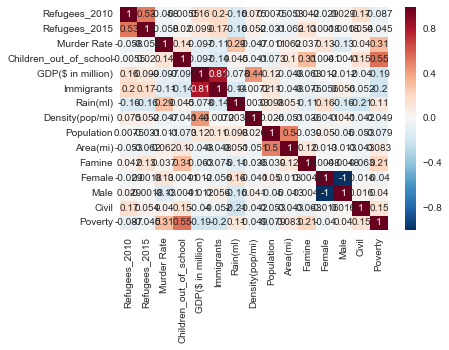

In [6]:
sns.heatmap(refugee_df.corr(), annot=True)

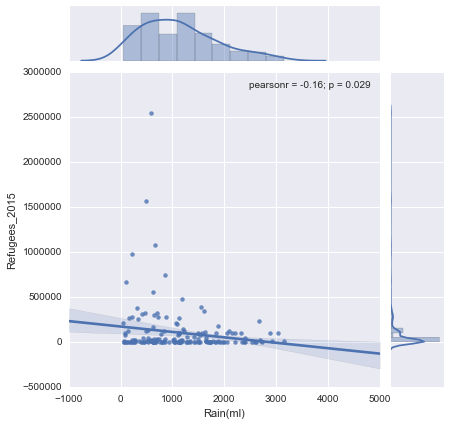

In [7]:
g = sns.jointplot("Rain(ml)", "Refugees_2015", data=refugee_df, kind="reg")

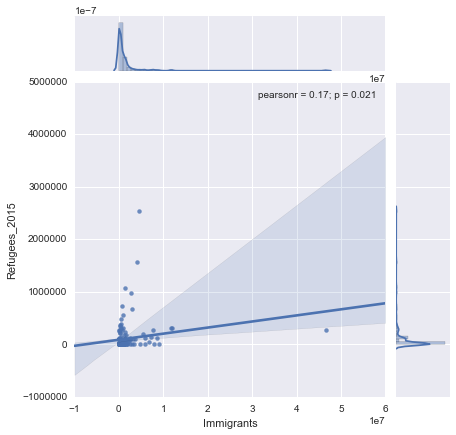

In [8]:
g = sns.jointplot("Immigrants", "Refugees_2015", data=refugee_df, kind="reg")

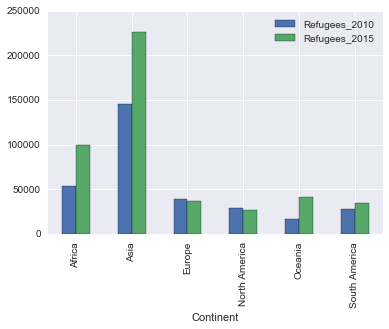

In [9]:
refugee_df.groupby('Continent')[['Refugees_2010', 'Refugees_2015']].mean().plot(kind = 'bar')

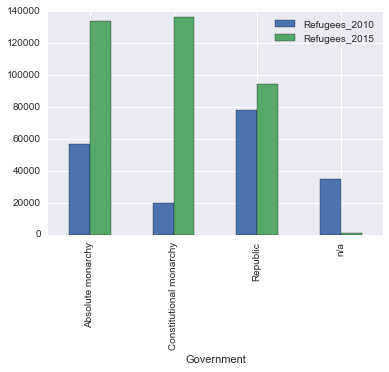

In [10]:
refugee_df.groupby('Government')[['Refugees_2010', 'Refugees_2015']].mean().plot(kind = 'bar')

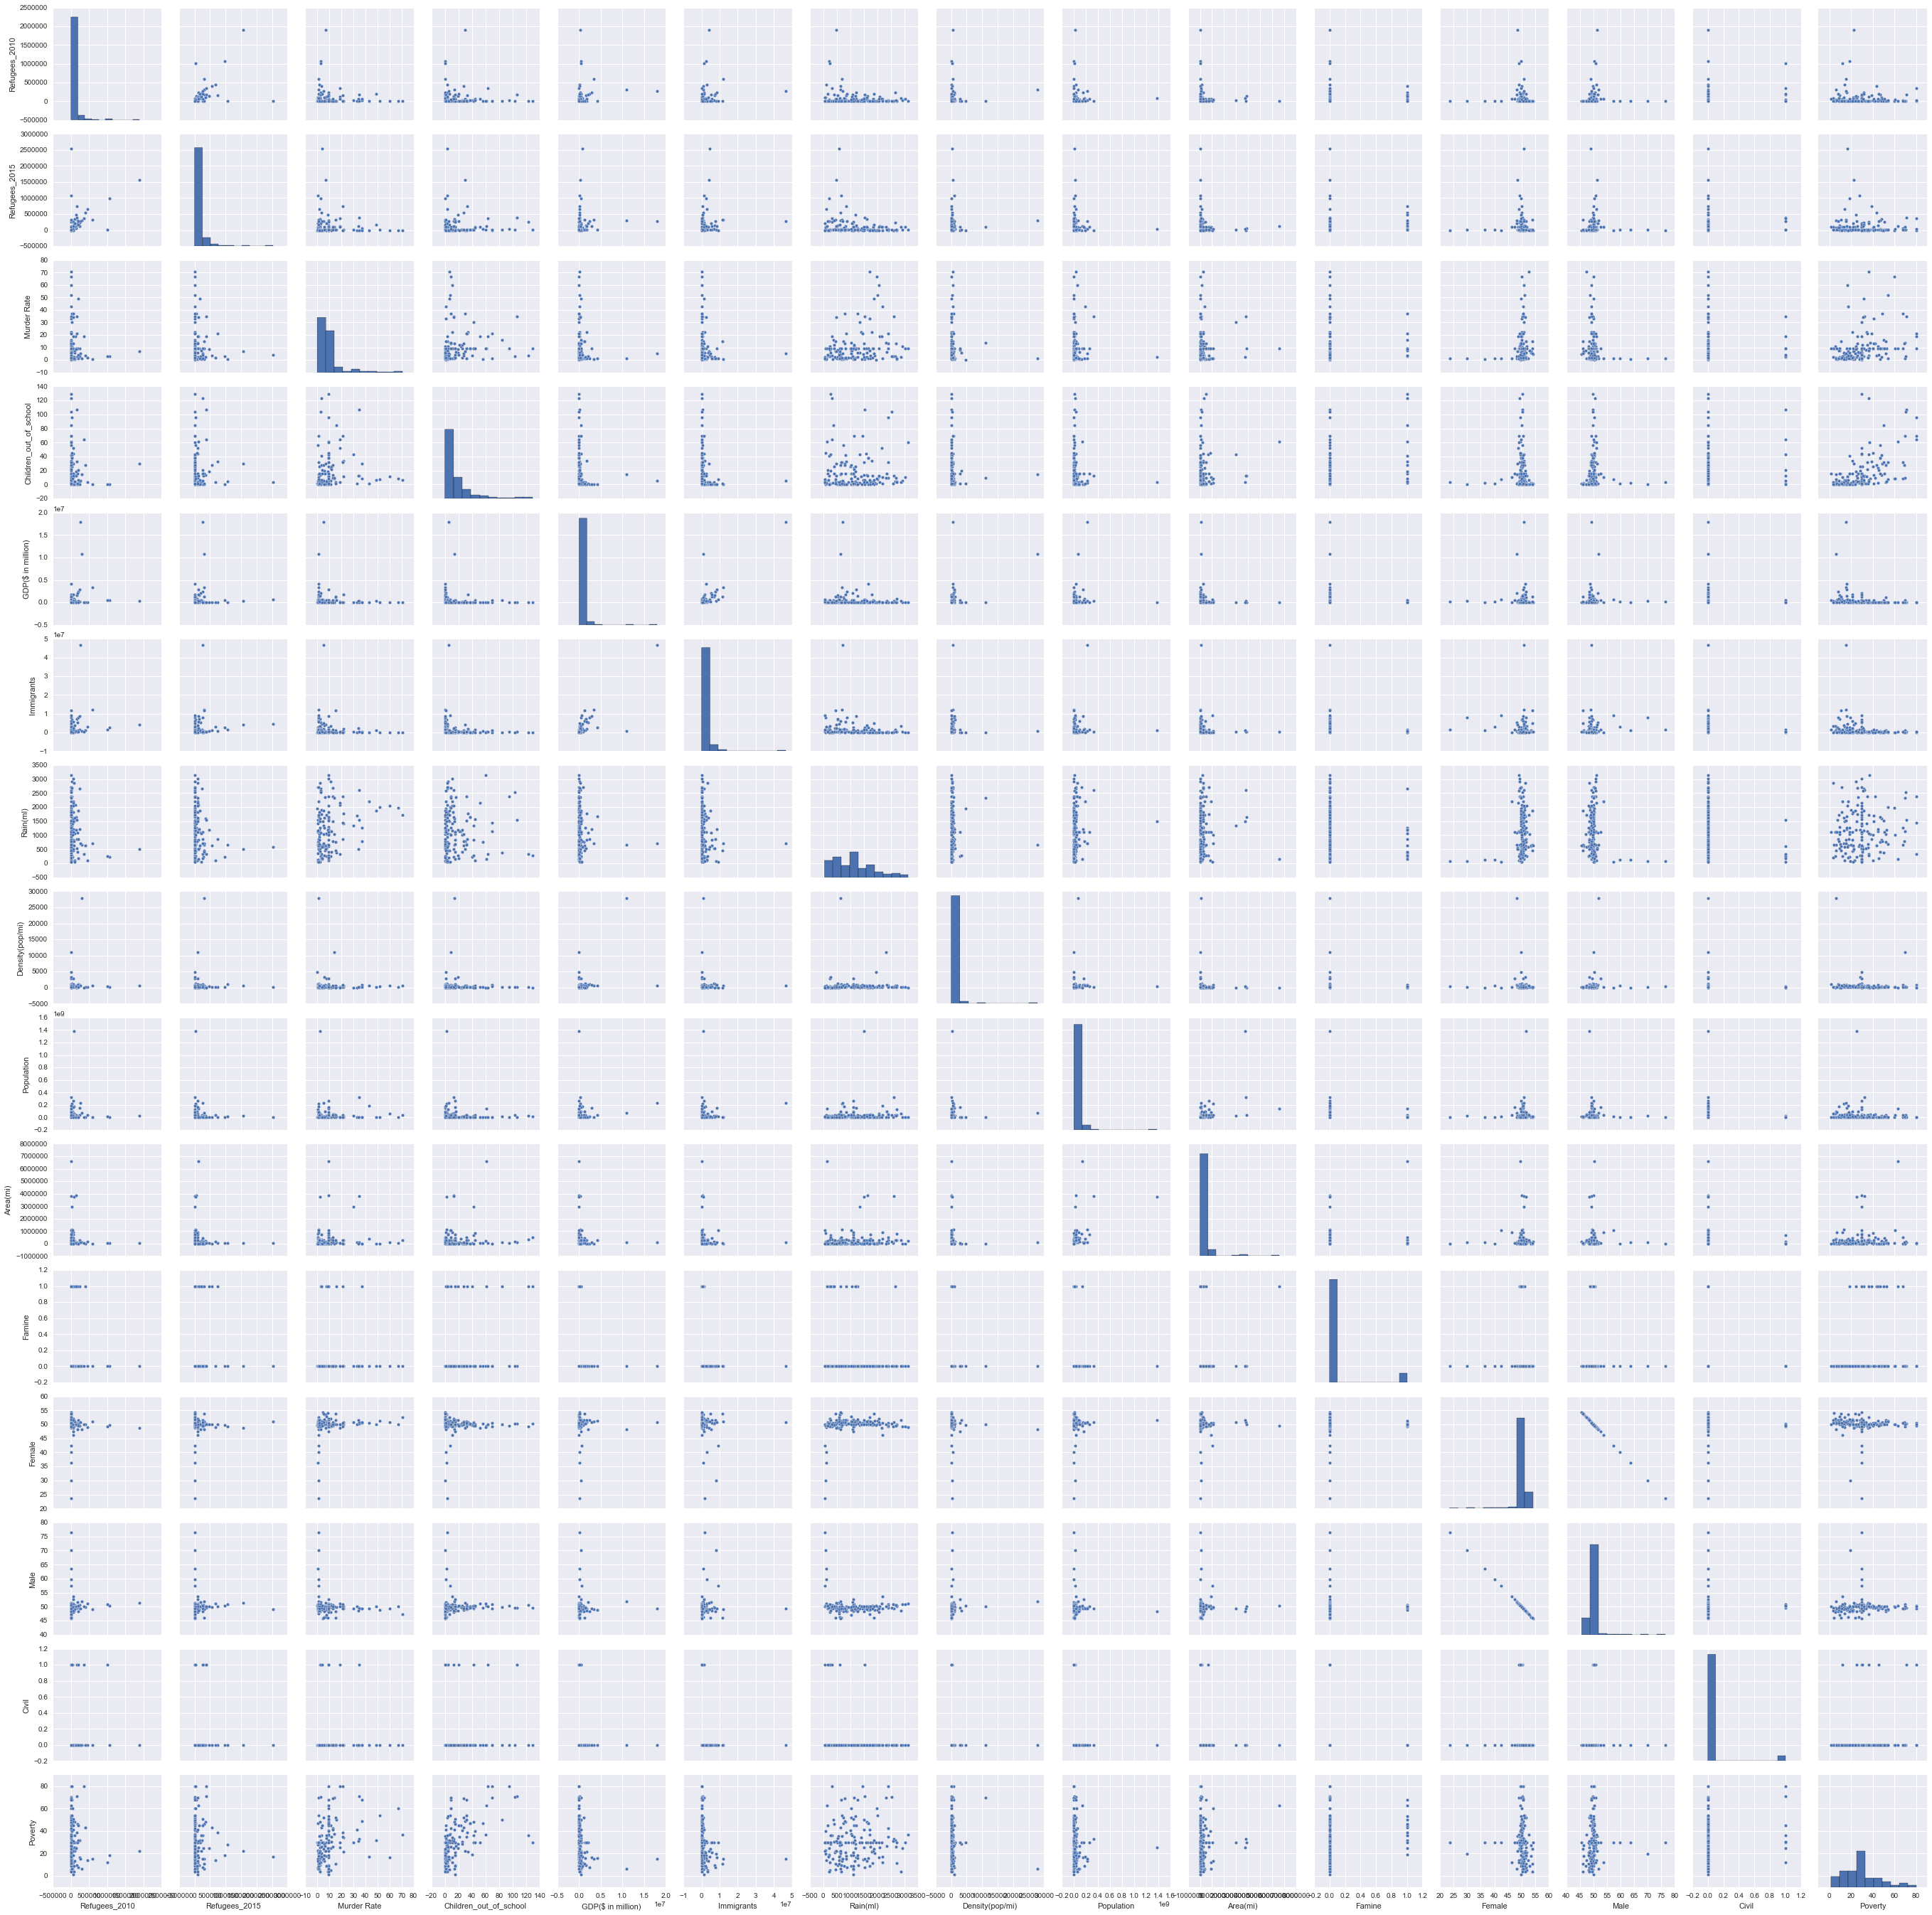

In [11]:
sns.pairplot(refugee_df)

# Description of model selection.

My model selection includes a Linear Regression model where I predict the number of refugees in 2015 based on the Number of Refugees in 2010, Rainfall in ml, Population of the country, whether a country had a famine in the past 15
years, Female and Male population. The first Logistic Regression model predicts whether a country had a Civil War in the past 15 years based on the number of Refugees in 2010, 2015, Murder Rate, Children out of primary school, size of the Country in miles, and whether the country had a Famine in the past 15 years. The second Logistic Regression is similar to the previous model except the target variable is whether the country had a Famine or not.


The main models of the project are the PCA, Clustering, and Neural Network models. The PCA model uses the linear regression model presented, and 6 PCAs to predict the number of Refugees in 2015. Using the keras library I created a neural network that used two layers to predict the binary value of the Civil War. The clustering model predicts the binary value of the Civil War, by using 3 clusters. In this section I have also included two ROC curves and Precision Recall curves to see the relationship between the train and test values of the binary values. 

# Well-documented code of modeling you performed to answer your question.

## Linear Regression

In [12]:
refugee_df

,Country,Key,Continent,Refugees_2010,Refugees_2015,Murder Rate,Children_out_of_school,Government,GDP($ in million),Immigrants,Rain(ml),Density(pop/mi),Population,Area(mi),Famine,Female,Male,Civil,Poverty
0,Afghanistan,AFG,Asia,6.434000e+03,2.575530e+05,3.400000,122.810000,Republic,1.919900e+04,1.050900e+05,327.000000,77.000000,2.370072e+07,3.086420e+05,1.0,49.30000,50.70000,0.0,36.000000
1,Angola,AGO,Africa,1.515500e+04,1.553700e+04,9.157481,25.420000,Republic,1.026430e+05,8.743600e+04,1010.000000,36.000000,2.589580e+05,7.172000e+03,0.0,50.40000,49.60000,0.0,40.500000
2,Albania,ALB,Europe,7.600000e+01,7.900000e+01,4.500000,6.860000,Constitutional monarchy,1.145600e+04,5.761600e+04,1485.000000,218.000000,1.518412e+07,6.989800e+04,0.0,49.90000,50.10000,0.0,14.300000
3,United Arab Emirates,ARE,Asia,5.380000e+02,6.580000e+02,0.920000,0.626000,Republic,3.702930e+05,7.826981e+06,78.000000,218.000000,2.012164e+07,9.204300e+04,0.0,29.90000,70.10000,0.0,19.500000
4,Argentina,ARG,South America,3.276000e+03,3.142000e+03,5.500000,0.938000,Constitutional monarchy,5.480550e+05,1.885678e+06,591.000000,19.200000,4.616000e+06,2.403240e+05,0.0,51.10000,48.90000,0.0,30.000000
5,Armenia,ARM,Europe,3.296000e+03,1.930900e+04,2.500000,2.780000,Republic,1.056100e+04,3.170010e+05,562.000000,245.000000,3.134700e+07,1.277240e+05,0.0,48.60000,51.40000,0.0,35.800000
6,French Southern and Antarctic Lands,ATF,NaN,6.716539e+04,1.018347e+05,9.157481,15.530864,NaN,4.521754e+05,1.416737e+06,1120.730061,548.838806,3.311787e+07,2.728787e+05,0.0,49.94939,50.05061,0.0,29.816667
7,Australia,AUS,Oceania,2.180500e+04,3.682700e+04,1.300000,3.060000,Republic,1.339539e+06,6.763663e+06,534.000000,1318.875000,2.147790e+07,1.321415e+05,0.0,50.20000,49.80000,0.0,29.816667
8,Austria,AUT,Europe,4.263000e+04,7.215800e+04,0.550000,3.010000,Constitutional monarchy,3.740560e+05,1.492374e+06,1110.000000,236.900000,9.169232e+07,3.870480e+05,0.0,51.20000,48.80000,0.0,6.200000
9,Azerbaijan,AZE,Europe,1.891000e+03,1.269000e+03,2.000000,7.010000,Constitutional monarchy,5.304700e+04,3.238430e+05,447.000000,249.000000,7.129300e+04,2.850000e+02,0.0,50.30000,49.70000,0.0,6.000000


In [13]:
value = refugee_df.filter(regex = 'Ref|Rain|Pop|Fam|Fem|Male')
rem = refugee_df.filter(regex = '2015')
col = value.columns - rem.columns
X = refugee_df[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee_df['Refugees_2015'].values

lm = LinearRegression()
model = lm.fit(X, y)
scores = cross_val_score(lm, X, y, cv=5)
print "R2", np.mean(scores)

R2 0.421159112523


/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


## Logistic Regression

In [14]:
#Logisitic Regression looking into Civil War.
value = refugee_df.filter(regex = 'Ref|Rate|Child|Are|Fam|Civ')
rem = refugee_df.filter(regex = 'Civ')
col = value.columns - rem.columns
X = refugee_df[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee_df['Civil'].values

lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 1000, 50)
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr_gs.fit(Xn, y)
best_lr = lr_gs.best_estimator_

cv_indices = StratifiedKFold(y, n_folds=5)

lr_scores = []
knn_scores = []

for train_inds, test_inds in cv_indices:
    
    Xtr, ytr = Xn[train_inds, :], y[train_inds]
    Xte, yte = Xn[test_inds, :], y[test_inds]
    
    best_lr.fit(Xtr, ytr)
    lr_scores.append(best_lr.score(Xte, yte))

print '----------------------'
print 'Logistic Regression:',np.mean(lr_scores)
print 'Baseline accuracy:', np.mean(y)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    1.8s


----------------------
Logistic Regression: 0.955538395538
Baseline accuracy: 0.0446927374302


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.1s finished


In [15]:
value = refugee_df.filter(regex = 'Ref|Rate|Child|Are|Fam|Civ')
rem = refugee_df.filter(regex = 'Fam')
col = value.columns - rem.columns
X = refugee_df[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee_df['Famine'].values
lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 1000, 50)
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr_gs.fit(Xn, y)
best_lr = lr_gs.best_estimator_

cv_indices = StratifiedKFold(y, n_folds=5)

lr_scores = []
knn_scores = []

for train_inds, test_inds in cv_indices:
    
    Xtr, ytr = Xn[train_inds, :], y[train_inds]
    Xte, yte = Xn[test_inds, :], y[test_inds]
    
    best_lr.fit(Xtr, ytr)
    lr_scores.append(best_lr.score(Xte, yte))

print '----------------------'
print 'Logistic Regression:',np.mean(lr_scores)
print 'Baseline accuracy:', np.mean(y)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.7s


----------------------
Logistic Regression: 0.921904761905
Baseline accuracy: 0.0782122905028


[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.8s finished


## ROC Curve

In [16]:
#Logisitic Regression looking into Civil War.
value = refugee_df.filter(regex = 'Ref|Rate|Child|Are|Fam|Civ')
rem = refugee_df.filter(regex = 'Civ')
col = value.columns - rem.columns
X = refugee_df[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee_df['Civil'].values

lm = LogisticRegression()
model = lm.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.4)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [17]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

def plot_roc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    fpr_, tpr_, _ = roc_curve(y, y_pp)
    auc_ = auc(fpr_, tpr_)
    acc_ = np.abs(0.5 - np.mean(y)) + 0.5
    
    fig, axr = plt.subplots(figsize=(8,7))

    axr.plot(fpr_, tpr_, label='ROC (area = %0.2f)' % auc_,
             color='darkred', linewidth=4,
             alpha=0.7)
    axr.plot([0, 1], [0, 1], color='grey', ls='dashed',
             alpha=0.9, linewidth=4, label='baseline accuracy = %0.2f' % acc_)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('false positive rate', fontsize=16)
    axr.set_ylabel('true positive rate', fontsize=16)
    axr.set_title(varname+' vs. not ROC curve\n', fontsize=20)

    axr.legend(loc="lower right", fontsize=12)

    plt.show()

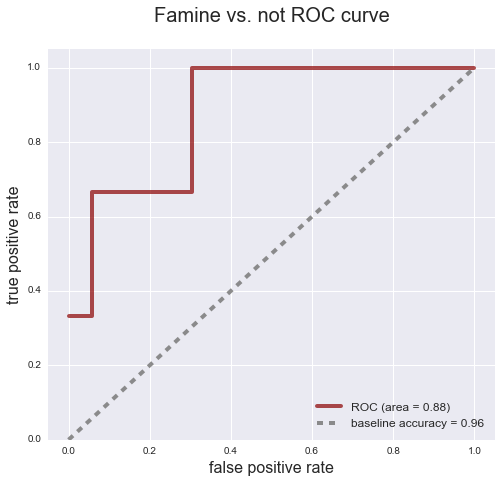

In [18]:
plot_roc(lm, X_test, y_test, 'Famine')

In [19]:
value = refugee_df.filter(regex = 'Ref|Child|Imm|Pop|Civil|Pover')
rem = refugee_df.filter(regex = 'Civ')
col = value.columns - rem.columns
X2 = refugee_df[col]
ss = StandardScaler()
Xn2 = ss.fit_transform(X2)
y2 = refugee_df['Civil'].values

lm2 = LogisticRegression()
model = lm2.fit(Xn2, y2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(Xn2, y2, test_size=0.4)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


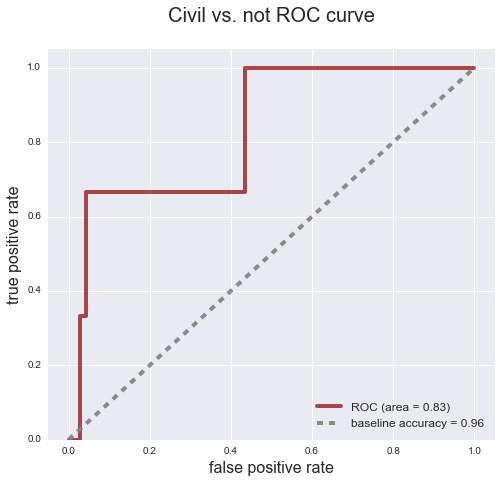

In [20]:
plot_roc(lm2, X_test2, y_test2, 'Civil')

## Precision Recall Curve

In [21]:
from sklearn.metrics import (precision_recall_curve, average_precision_score, f1_score)

def plot_prauc(mod, X, y, varname):
    mod.fit(X, y)
    y_pp = mod.predict_proba(X)[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_pp)
    avg_precision = average_precision_score(y, y_pp)
    
    fig, axr = plt.subplots(figsize=(8,7))

    axr.plot(recall, precision, label='PRAUC (area = %0.2f)' % avg_precision,
             color='steelblue', linewidth=4,
             alpha=0.7)

    axr.set_xlim([-0.05, 1.05])
    axr.set_ylim([0.0, 1.05])
    axr.set_xlabel('recall', fontsize=16)
    axr.set_ylabel('precision', fontsize=16)
    axr.set_title(varname+' vs. not PRAUC curve\n', fontsize=20)

    axr.legend(loc="upper right", fontsize=12)

    plt.show()

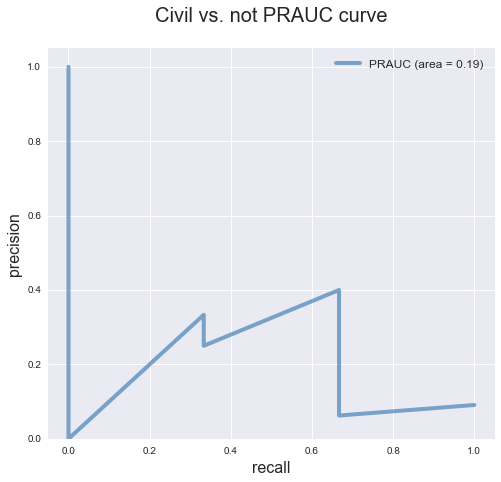

In [22]:
plot_prauc(lm2, X_test2, y_test2, 'Civil')

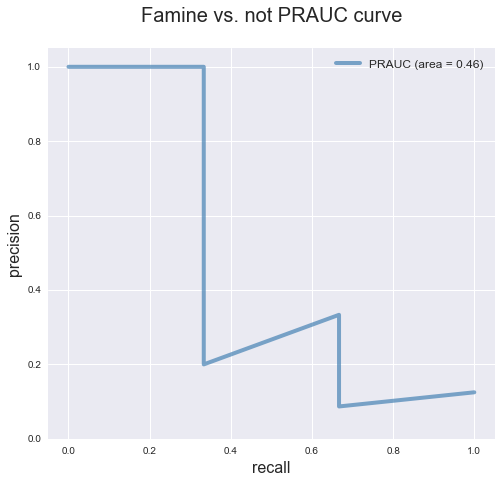

In [23]:
plot_prauc(lm, X_test, y_test, 'Famine')

## PCA

In [24]:
value = refugee_df.filter(regex = 'Ref|Rain|Pop|Fam|Fem|Male')
rem = refugee_df.filter(regex = '2015')
col = value.columns - rem.columns
X = refugee_df[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee_df['Refugees_2015'].values

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(X.values)

PCA(copy=True, n_components=6, whiten=False)

In [26]:
pcs = pca.transform(X)
pca_linreg = LinearRegression()
pca_scores = cross_val_score(pca_linreg, pcs[:,0:10], y, cv=5)
print np.mean(pca_scores)

0.421159112526


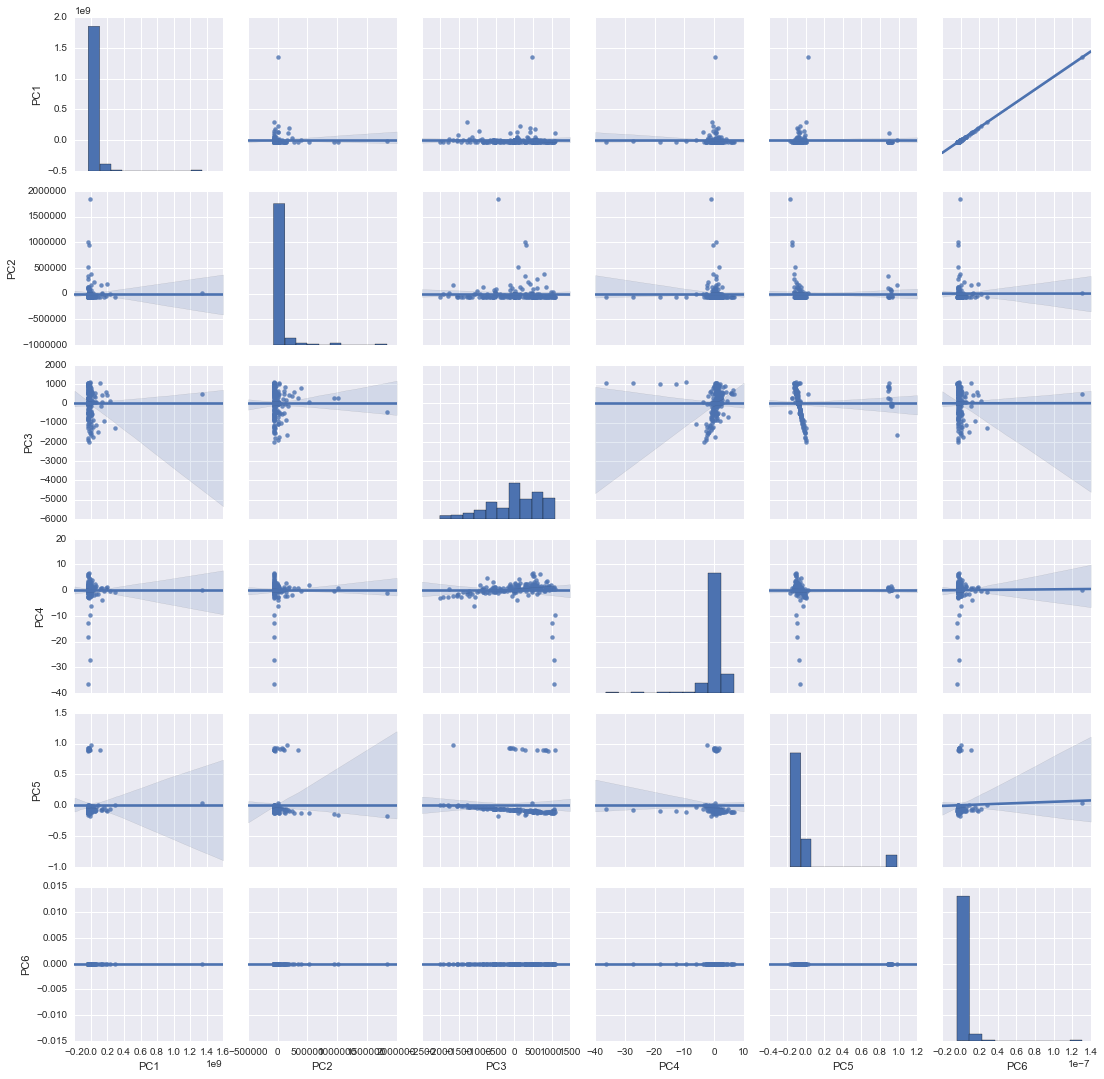

In [27]:
sns.pairplot(pd.DataFrame(pcs, columns=['PC1','PC2','PC3','PC4','PC5', 'PC6']), kind='reg')

## Neural Network

In [28]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation

Using TensorFlow backend.


In [29]:
value = refugee_df.filter(regex = 'Ref|Rate|Child|Are|Fam|Civ')
rem = refugee_df.filter(regex = 'Civ')
col = value.columns - rem.columns
X = refugee_df[col]
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = refugee_df['Civil'].values

X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.4)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


In [30]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(y_train)
test_y_ohe = one_hot_encode_object_array(y_test)

In [31]:
model = Sequential()
model.add(Dense(1000, input_shape=(6,)))
model.add(Activation('sigmoid'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model.fit(X_train, train_y_ohe, nb_epoch=100, verbose=1);

Epoch 1/100
107/107 [==============================] - 0s - loss: 0.2829 - acc: 0.9720     
Epoch 2/100
107/107 [==============================] - 0s - loss: 0.1362 - acc: 0.9720     
Epoch 3/100
107/107 [==============================] - 0s - loss: 0.1546 - acc: 0.9720     
Epoch 4/100
107/107 [==============================] - 0s - loss: 0.1652 - acc: 0.9720     
Epoch 5/100
107/107 [==============================] - 0s - loss: 0.1616 - acc: 0.9720     
Epoch 6/100
107/107 [==============================] - 0s - loss: 0.1506 - acc: 0.9720     
Epoch 7/100
107/107 [==============================] - 0s - loss: 0.1350 - acc: 0.9720     
Epoch 8/100
107/107 [==============================] - 0s - loss: 0.1208 - acc: 0.9720     
Epoch 9/100
107/107 [==============================] - 0s - loss: 0.1237 - acc: 0.9720     
Epoch 10/100
107/107 [==============================] - 0s - loss: 0.1261 - acc: 0.9720     
Epoch 11/100
107/107 [==============================] - 0s - loss: 0.1222 - acc

In [32]:
loss, accuracy = model.evaluate(X_test, test_y_ohe, verbose=0)
print accuracy

0.902777777778


# Decision Tree

In [33]:
value = refugee_df.filter(regex = 'Ref|Child|Imm|Pop|Civil|Pover')
rem = refugee_df.filter(regex = 'Civ')
col = value.columns - rem.columns
X2 = refugee_df[col]
ss = StandardScaler()
Xn2 = ss.fit_transform(X2)
y2 = refugee_df['Civil'].values

X_train, X_test, y_train, y_test = train_test_split(Xn2, y2, test_size=0.3)

## Define your DecisionTreeClassifier
dctc = DecisionTreeClassifier()

## Search parameters
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt','auto', 2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

## Gridsearch    
dtc_gs = GridSearchCV(dctc, dtc_params, n_jobs=-1, cv=5, verbose=1)

/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  app.launch_new_instance()


In [34]:
dtc_gs.fit(X_train, y_train)

## Print best estimator, best parameters, and best score
dtc_best_estimator = dtc_gs.best_estimator_
print "best estimator", dtc_best_estimator

print "\n==========\n"
dct_best_param = dtc_gs.best_params_
print "best parameters",  dct_best_param 

print "\n==========\n"
print "best score", dtc_gs.best_score_

Fitting 5 folds for each of 440 candidates, totalling 2200 fits


//anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:    2.1s


best estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=15, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


best parameters {'max_features': None, 'min_samples_split': 15, 'max_depth': None}


best score 0.968


[Parallel(n_jobs=-1)]: Done 2200 out of 2200 | elapsed:    5.8s finished


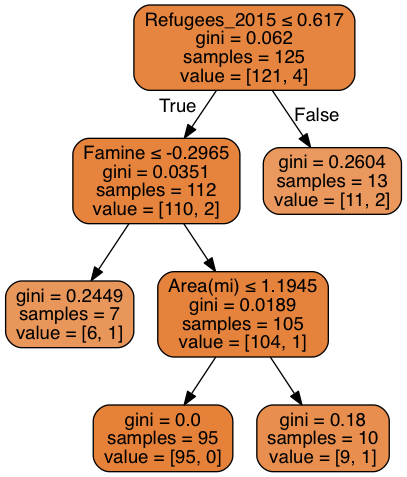

In [35]:
dot_data = StringIO()

## Define decision tree with best parameters, you can also use the best estimators
dctc_best = dtc_gs.best_estimator_

## Graph
export_graphviz(dctc_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

# Description of results.

In [36]:
import folium
import pandas as pd

world_geo = r'/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/data.json'
final = pd.read_csv('../Data/final.csv')
map = folium.Map(location=[48, -102], zoom_start=1.7)
map.choropleth(geo_path=world_geo, data=final,
             columns=['Key', 'Refugees_2010'],
             threshold_scale=[0, 5000, 100000, 700000, 1000000, 3000000],
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.5,
             legend_name='Unemployment Rate (%)', reset = True)
map

In [37]:
import folium
import pandas as pd

world_geo = r'/Users/nsivapra/Desktop/DSI-SF-2-nsivapra/Capstone/Data/data.json'
final = pd.read_csv('../Data/final.csv')
map = folium.Map(location=[48, -102], zoom_start=1.7)
map.choropleth(geo_path=world_geo, data=final,
             columns=['Key', 'Refugees_2015'],
             threshold_scale=[0, 5000, 100000, 700000, 1000000, 3000000],
             key_on='feature.id', 
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.5,
             legend_name='Unemployment Rate (%)', reset = True)
map

# Conclusion.

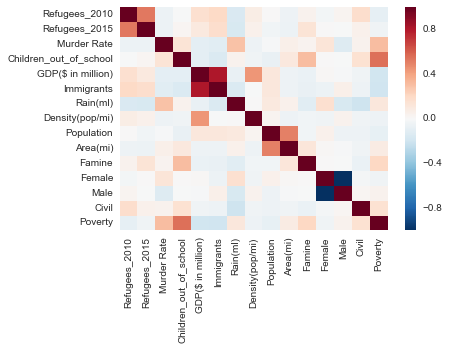

In [38]:
sns.heatmap(refugee_df.corr())

Based on the linear regression R2 we can say there is moderate amount of variance between the predictor variables and the baseline model. Some variables that lowers the R2 are the binary Civil War value, and the number of Children out of school, by removing theses variables the R2 increased from 0.34 to 0.42. There are still some possible methods that could improve the R2 including grid search, and loss function techniques including Ridge, Lasso, and Elastic Net. We could conclude the number of Refugees in 2010, Rain fall in ml, Population of the countries, recent famines, and the Female and Male population are helpful in predicting the number of Refugees in 2015.

Using the logisitc regression R2, for both the models predicting Civil War and Famine there is a high variance between the predictor variables and the baseline model. Using the number of refugees in 2010, Murder Rate of each country, primary school children out of 1000, area of the country, whether a country had a famine, and recent civil wars I was able to predict either the binary value of a civil war or famine.

Based on the country's profile we can say there is an impact on the number of refugees who will find asylum at the country. If there a high number of refugees in 2010, GDP, and number of immigrants there is a higher chance of refugees in 2015. If there is a high number of Rainfall, and Murder Rate there is a chance of a descent between 2010 and 2015.